In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
np.seterr(divide='ignore')

data = pd.read_csv('C:/Users/david/Desktop/maturitni_prace/data_analysis_python/eff_october.csv', sep=',', header=None)

names = []
energy = np.array([])
eff = np.array([])
#print(data)

In [2]:
yerr = []
for i in range(3):
    names.append(data[i][0])
for j in range(1,31):
    eff = np.append(eff, float(data[0][j]))
    yerr = np.append(yerr, float(data[1][j]))
    energy = np.append(energy, float(data[2][j]))

In [3]:
def func(x, a, b, c, d, e, f):
    return a * np.log(x)+ b * pow(np.log(x), 2) + c * pow(np.log(x), 3) + d * pow(np.log(x), 4) + e *pow(np.log(x), 5) + f

def linear(x, a, b):
    return a * (x) + b

a0 = -4.122191 +- 0.7323317 (17 %)
a1 = 1.620808 +- 0.2766304 (17 %)
a2 = -0.312858 +- 0.0518798 (16 %)
a3 = 0.029710 +- 0.0048319 (16 %)
a4 = -0.001113 +- 0.0001788 (16 %)
a5 = 4.112870 +- 0.7698687 (18 %)


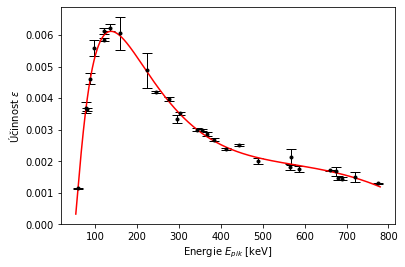

In [4]:

for i in range(1):#sloupce 5
    output = []
    pars, cov = curve_fit(f=func, xdata=energy, ydata=eff, sigma=1./(np.log((yerr*eff))**2))
    coeff_err = np.sqrt(np.diag(cov))
    for i in range(len(pars)):
        output.append('a{0} = {1:.6f} +- {2:.7f} ({3:d} %)'.format(i, pars[i], coeff_err[i], abs(int(coeff_err[i]/pars[i]*100))))

    for i in output:
        print(i)
        
    global eff_param
    eff_param = pars

    #plotovani
    p = np.linspace(min(energy)-5, max(energy)+5, 100000)
    plt.errorbar(energy, eff, yerr=yerr, fmt=".", elinewidth=1, capsize=5, ecolor='black',color='black')
    plt.plot(p, func(p, *pars), c="red")
    plt.ylabel(r"Účinnost $\varepsilon$")
    plt.xlabel(r"Energie $E_{pik}$ [keV]")
    plt.ylim(ymin=0)#omezeni aby vykreslovalo jen kladna y
    plt.savefig('ucinnost.png', dpi = 800)

In [5]:
print(func(185.712, *eff_param))
print(func(766.38, *eff_param))

0.005579466012117784
0.0012628411273754026


# parameters:
* a0 = -4.133349 +- 0.6703348 (16 %) 
* a1 = 1.625515 +- 0.2530204 (15 %)
* a2 = -0.313862 +- 0.0474190 (15 %)
* a3 = 0.029817 +- 0.0044139 (14 %)
* a4 = -0.001117 +- 0.0001633 (14 %)
* a5 = 4.123716 +- 0.7052136 (17 %)

$$
I =  I_0 \cdot e^{masscoef * neco}
$$
kde
$masscoeff * neco $ musi byt beztrozmerne,  I je zareni ktere zmerime na detektoru
potom
$$
neco [cm^{-2}g] \implies density [cm^{-3}g] * height [cm]
$$

In [6]:
file1 = open(r'C:\Users\david\Desktop\maturitni_prace\UmassCoefff.txt', 'r')
#soubor skopirovaných dat z https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z92.html
fileUO = pd.read_csv('C:/Users/david/Desktop/maturitni_prace/UO2massCoefff.csv', sep=',', header=None)
#vypocitana hodnota z druheho notebooku

energy_as_x_to_masscoeff_UO = np.array([])
masscoef_UO = np.array([])

for j in range(len(fileUO)):
    if j == 0:
        print(fileUO[0][j])
    energy_as_x_to_masscoeff_UO = np.append(energy_as_x_to_masscoeff_UO, float(fileUO[0][j]))
    masscoef_UO = np.append(masscoef_UO, float(fileUO[1][j]))
    
energy_as_x_to_masscoeff = [] #MeV
masscoef_U = [] #(cm2/g)
v1_density = 18.37414276 #g/cm3
v1_height =  9.99 / 10 #cm

for line in file1:
    energy_as_x_to_masscoeff.append(float(line[3:14]))
    masscoef_U.append(float(line[15:25]))

0.001


In [7]:
def calculate_absorbtion(energy, energy_x_values = energy_as_x_to_masscoeff, masscoef = masscoef_U, D = v1_height, density = v1_density):
    energy = energy/1000
    for k in range(len(energy_x_values)):
        eng = energy_x_values[k]
        if eng > energy:
            pars, cov = curve_fit(f=linear, xdata=[last_eng, eng], ydata=[masscoef[k-1], masscoef[k]])
            masscoef_of_U = linear(energy, *pars)
            print("mu times e = {}".format(masscoef_of_U * np.exp(-(masscoef_of_U * density * D))))
            return (masscoef_of_U * density * D)/(1 - np.exp(-(masscoef_of_U * density * D)))

        last_eng = eng

print(calculate_absorbtion(185.712, D = 9.99 / 10))
print(calculate_absorbtion(766.38, D = 9.99 / 10))
print(calculate_absorbtion(185.712, D = 10.02 / 10, density= 18.60655066))
print(calculate_absorbtion(766.38, D = 10.02 / 10, density= 18.60655066))
print(calculate_absorbtion(185.712,energy_x_values=energy_as_x_to_masscoeff_UO, masscoef=masscoef_UO, D = 11.7 / 10, density=10.45108261 ))
print(calculate_absorbtion(766.38,energy_x_values=energy_as_x_to_masscoeff_UO, masscoef=masscoef_UO, D = 11.7 / 10, density= 10.45108261))

mu times e = 8.495115796889359e-14
30.608018026179913
mu times e = 0.014663201543900075
2.321943623537837
mu times e = 5.2554363262103066e-14
31.088246380832555
mu times e = 0.01420772774961763
2.3471096295283784
mu times e = 1.9916884533266852e-08
18.1252975207002
mu times e = 0.02902800633950679
1.7813089781282652


c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
